<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/week2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The week2 lab utilizes python code for  Gradient Decent  Algorithm.
Then it provides code for Multiple Linear Regression , Matrix for  measuring the accuracy of the Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
The week2 lab utilizes python code for  Gradient Decent  Algorithm.
Then it provides code for Multiple Linear Regression , Matrix for  measuring the accuracy of the Linear Regression

In [ ]:
Linear Regression is a fundamental machine learning algorithm used for predicting a continuous dependent variable based on one or more independent variables. We'll implement it using both scikit-learn's built-in LinearRegression and a custom Gradient Descent approach to understand the underlying mechanics.
numpy & pandas: For numerical operations and data manipulation.
matplotlib & seaborn: For data visualization.
scikit-learn modules: For data loading, model training, splitting, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For data loading and splitting
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# For model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For scaling features
from sklearn.preprocessing import StandardScaler
# Load the California Housing dataset
california = fetch_california_housing()

# Create a DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Display the first five rows
print(data.head(10))
data.count()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

,0
MedInc,20640
HouseAge,20640
AveRooms,20640
AveBedrms,20640
Population,20640
AveOccup,20640
Latitude,20640
Longitude,20640
MedHouseVal,20640


In [ ]:
# Check for missing values
print(data.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Statistical summary
print(data.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

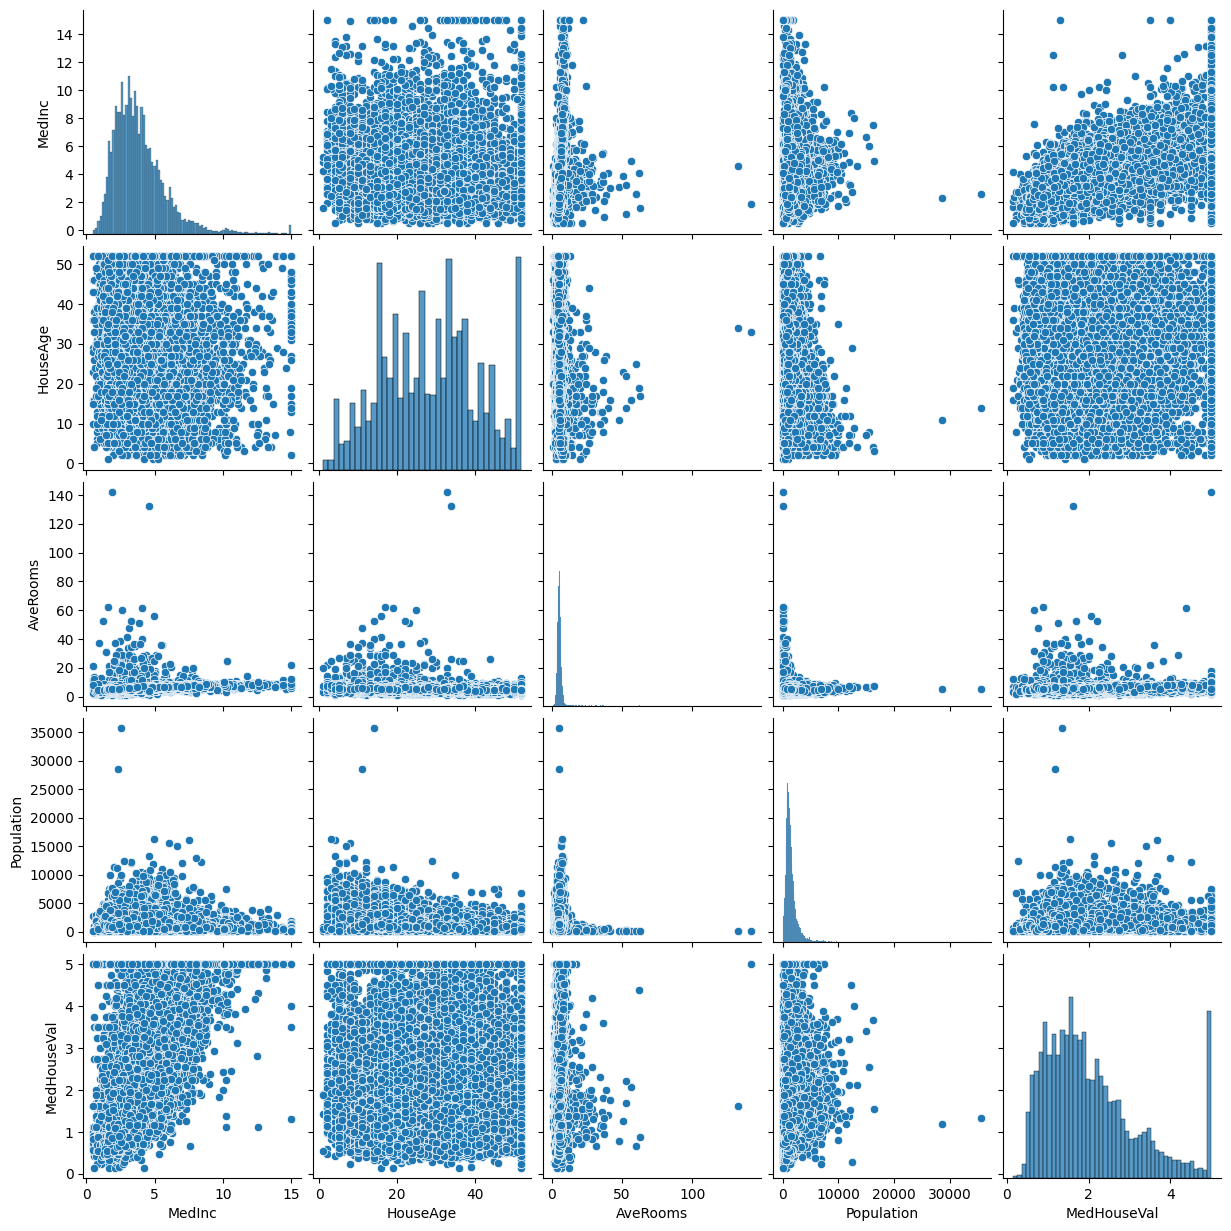

In [ ]:
#Visualizing Feature Relationships
# Pairplot for selected features
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'MedHouseVal']])
plt.show()


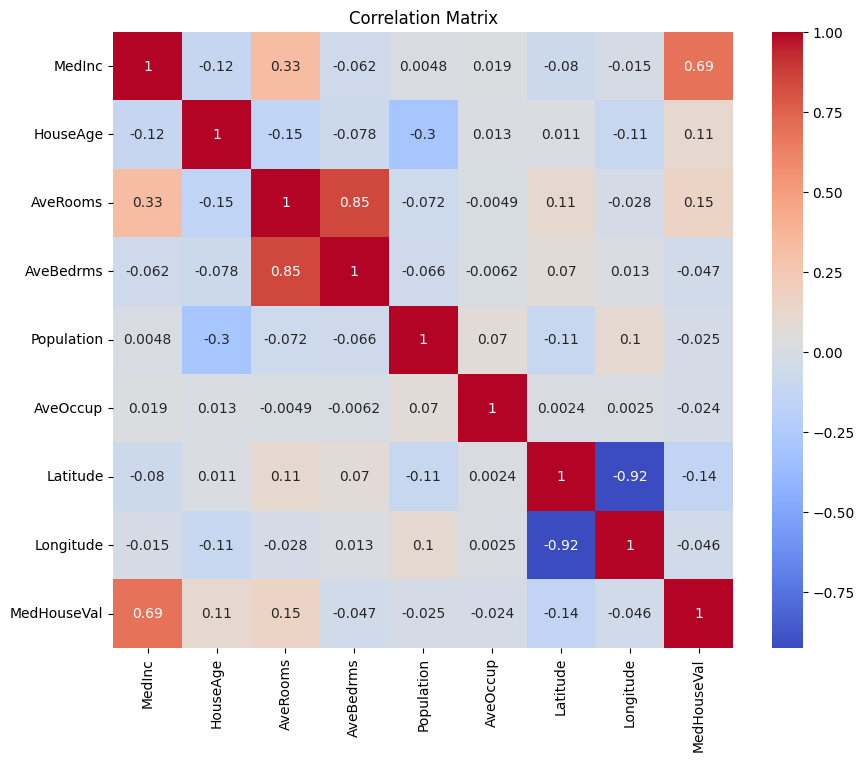

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Step 4: Splitting the Dataset
# Features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (16512, 8)
Testing set size: (4128, 8)


In [ ]:
import numpy as np

# Coefficients
print("Intercept (b0):", round(lr_model.intercept_, 3))
print("Coefficients (b1, b2, ..., b8):", np.round(lr_model.coef_, 4))


Intercept (b0): -37.023
Coefficients (b1, b2, ..., b8): [ 0.4487  0.0097 -0.1233  0.7831 -0.     -0.0035 -0.4198 -0.4337]


Evaluating the Model
Mean Squared Error (MSE): Average of the squares of the errors.
Root Mean Squared Error (RMSE): Square root of MSE.
Mean Absolute Error (MAE): Average of absolute errors.
R-squared (R²): Proportion of variance explained by the model.

In [ ]:
# Predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== scikit-learn Linear Regression Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

=== scikit-learn Linear Regression Evaluation ===
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R²): 0.5758


Making Predictions

In [ ]:
# Dummy data for prediction (same feature structure as X)
dummy_data = pd.DataFrame({
    'MedInc': [5.0, 8.0, 3.0],
    'HouseAge': [30, 10, 40],
    'AveRooms': [6.0, 5.0, 4.0],
    'AveBedrms': [1.0, 1.5, 1.0],
    'Population': [1000, 500, 2000],
    'AveOccup': [3.0, 2.5, 4.0],
    'Latitude': [34.0, 36.0, 38.0],
    'Longitude': [-120.0, -121.0, -122.0]
})

# Predictions
dummy_predictions = lr_model.predict(dummy_data)

print("=== Predictions on Dummy Data using scikit-learn Linear Regression ===")
for i, pred in enumerate(dummy_predictions, 1):
    print(f"Dummy Data {i}: Predicted MedHouseVal = {pred:.4f}")

=== Predictions on Dummy Data using scikit-learn Linear Regression ===
Dummy Data 1: Predicted MedHouseVal = 3.3144
Dummy Data 2: Predicted MedHouseVal = 4.5778
Dummy Data 3: Predicted MedHouseVal = 1.9437


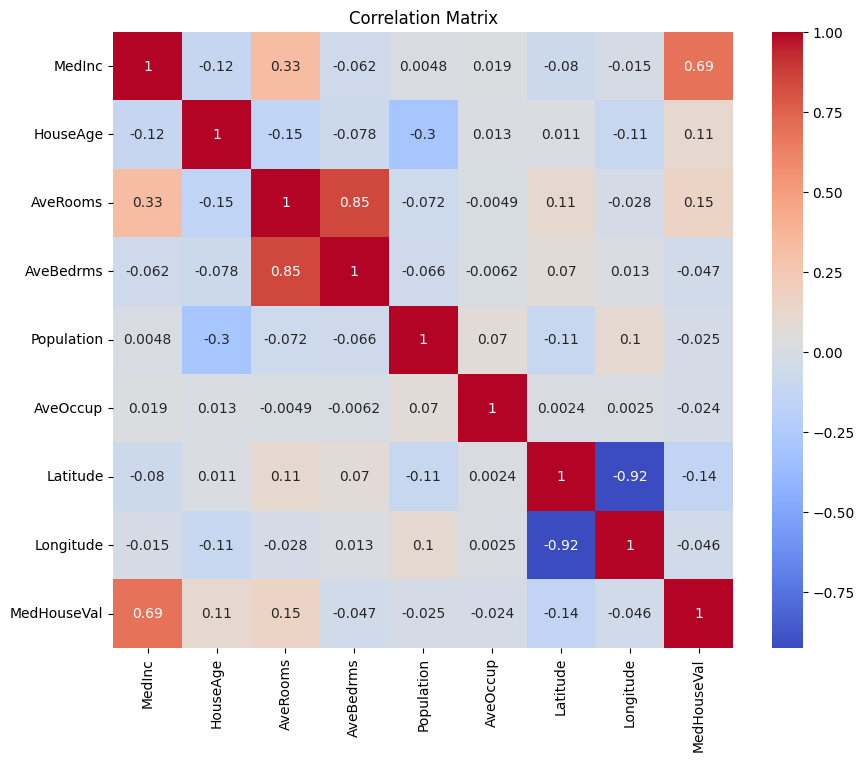

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#We'll select features whose absolute correlation with MedHouseVal is greater than or equal to 0.5.
# Get absolute correlations with the target variable
corr_target = abs(corr_matrix['MedHouseVal'])

# Select features with correlation >= 0.05
high_corr_features = corr_target[corr_target >= 0.15].index.tolist()

# Remove the target variable from the list
high_corr_features.remove('MedHouseVal')

print("Features with high correlation (|correlation| >= 0.5) with MedHouseVal:")
print(high_corr_features)

Features with high correlation (|correlation| >= 0.5) with MedHouseVal:
['MedInc', 'AveRooms']


In [ ]:
# Define the feature matrix X and target vector y using high correlation features
X = data[high_corr_features]
y = data['MedHouseVal']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (16512, 2)
Testing set size: (4128, 2)


In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train, y_train)

# Display the model's intercept and coefficients
print(f"Intercept (b0): {lr_model.intercept_}")
print(f"Coefficients (b1, b2, b3): {lr_model.coef_}")

Intercept (b0): 0.5972677793933272
Coefficients (b1, b2, b3): [ 0.43626089 -0.04017161]


In [ ]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 0.7022
Root Mean Squared Error (RMSE): 0.8379
Mean Absolute Error (MAE): 0.6247
R-squared (R²): 0.4642
